### Imports

In [39]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Preprocessing and data splits

11867


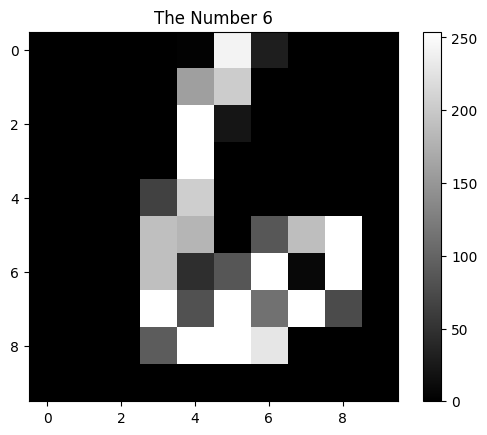

In [ ]:


data = loadmat('data/MNISTmini.mat')
# print(data.keys())  # Shows variables in the file
# dataFrame  = pd.DataFrame(data)

colList = []
for i in range(len(data['train_fea1'][0])):
    colList.append(f"col{i+1}")

indexTrain = np.where(data['train_gnd1'] == 6)[0].tolist() + np.where(data['train_gnd1'] == 9)[0].tolist()
print(len(indexTrain))
dfTrain = pd.DataFrame(data['train_fea1'][indexTrain], columns=colList)
dfTrain['y'] = data['train_gnd1'][indexTrain]
dfTrain['y'] = dfTrain['y'].replace({6: 0, 9: 1})
dfTrain = dfTrain.reset_index(drop=True)

# Train and validation sets
x_train, x_val, y_train, y_val = train_test_split(dfTrain.drop(columns=['y']).reset_index(drop=True), dfTrain['y'], test_size=0.2, random_state=42)
indexTest = np.where(data['test_gnd1'] == 6)[0].tolist() + np.where(data['test_gnd1'] == 9)[0].tolist()
dfTest = pd.DataFrame(data['test_fea1'][indexTest], columns=colList)
dfTest['y'] = data['test_gnd1'][indexTest]
dfTest['y'] = dfTest['y'].replace({6: 0, 9: 1})
# Test sets
x_test = dfTest.drop(columns=['y'])
y_test = dfTest["y"]
 

img = x_train.iloc[0].to_numpy()
# Tranpose because the image is rotated
img = np.transpose(img.reshape(10,10))
# use grayscale
plt.title(f"The Number {6 if y_train.iloc[0] == 0 else 9}")
plt.imshow(img, cmap='gray')  
plt.colorbar()                
plt.show()

# Training

In [59]:
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['col1', 'col2', 'col3'])
print(df)

   col1  col2  col3
0     1     2     3
1     4     5     6
2     7     8     9
